# Assignment 1: Wine Classification - Edward (Hua) Zeng

In [1]:
import pandas
import matplotlib
import seaborn
%matplotlib inline

C:\Users\Hua\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
wine = pandas.read_csv('../Assigment 1/wine.csv')
wine[:3]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0            7.4              0.70         0.00             1.9   
1            7.8              0.88         0.00             2.6   
2            7.8              0.76         0.04             2.3   

   free_sulfur_dioxide  total_sulfur_dioxide    ph  class  
0                 11.0                  34.0  3.51      1  
1                 25.0                  67.0  3.20      1  
2                 15.0                  54.0  3.26      1

## Original Data Missed Infomation. Created the dataset from UCI Lib

In [4]:
wine_white = pandas.read_csv('../Assigment 1/winequality-white.csv', delimiter=";")
wine_white['class'] = 0 
wine_red = pandas.read_csv('../Assigment 1/winequality-red.csv', delimiter=";")
wine_red['class'] = 1 
list_ = []
list_.append(wine_white)
list_.append(wine_red)
wine_all = pandas.concat(list_)
wine_all.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                    'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'quality', 'class']
del wine_all['quality']
wine_all[:3]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   

   alcohol  class  
0      8.8      0  
1      9.5      0  
2     10.1      0

In [5]:
wine_all.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'ph', u'sulphates', u'alcohol',
       u'class'],
      dtype='object')

In [6]:
len(wine_all) # number of rows

6497

In [7]:
list(wine_all['class'].unique())

[0, 1]

## Sampling rows

In [8]:
# grab a random sampling of the rows and check class distribution
wine_mini = wine_all.sample(n=30)
wine_mini.groupby('class').size()

class
0    22
1     8
dtype: int64

## Exploring the data

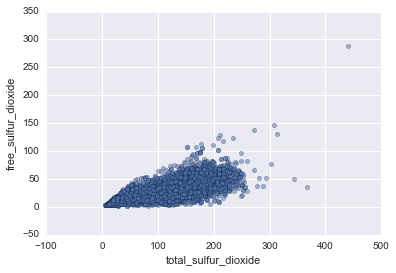

In [9]:
wine_all.plot(
    kind='scatter', 
    x='total_sulfur_dioxide', 
    y='free_sulfur_dioxide', 
    alpha=0.5, 
    by='class')

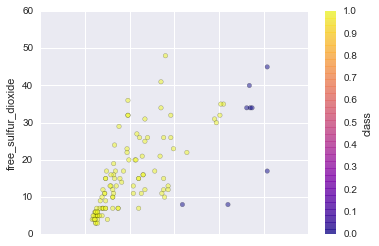

In [10]:
wine_all[wine_all.volatile_acidity > 0.8].plot(
    kind='scatter', 
    x='total_sulfur_dioxide', 
    y='free_sulfur_dioxide', 
    c='class', 
    alpha=0.5,  
    colormap='plasma')

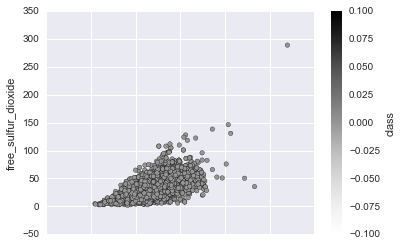

In [11]:
wine_all[wine_all['class']==0].plot(kind='scatter', x='total_sulfur_dioxide', y='free_sulfur_dioxide', c='class')

## Comparing feature distributions

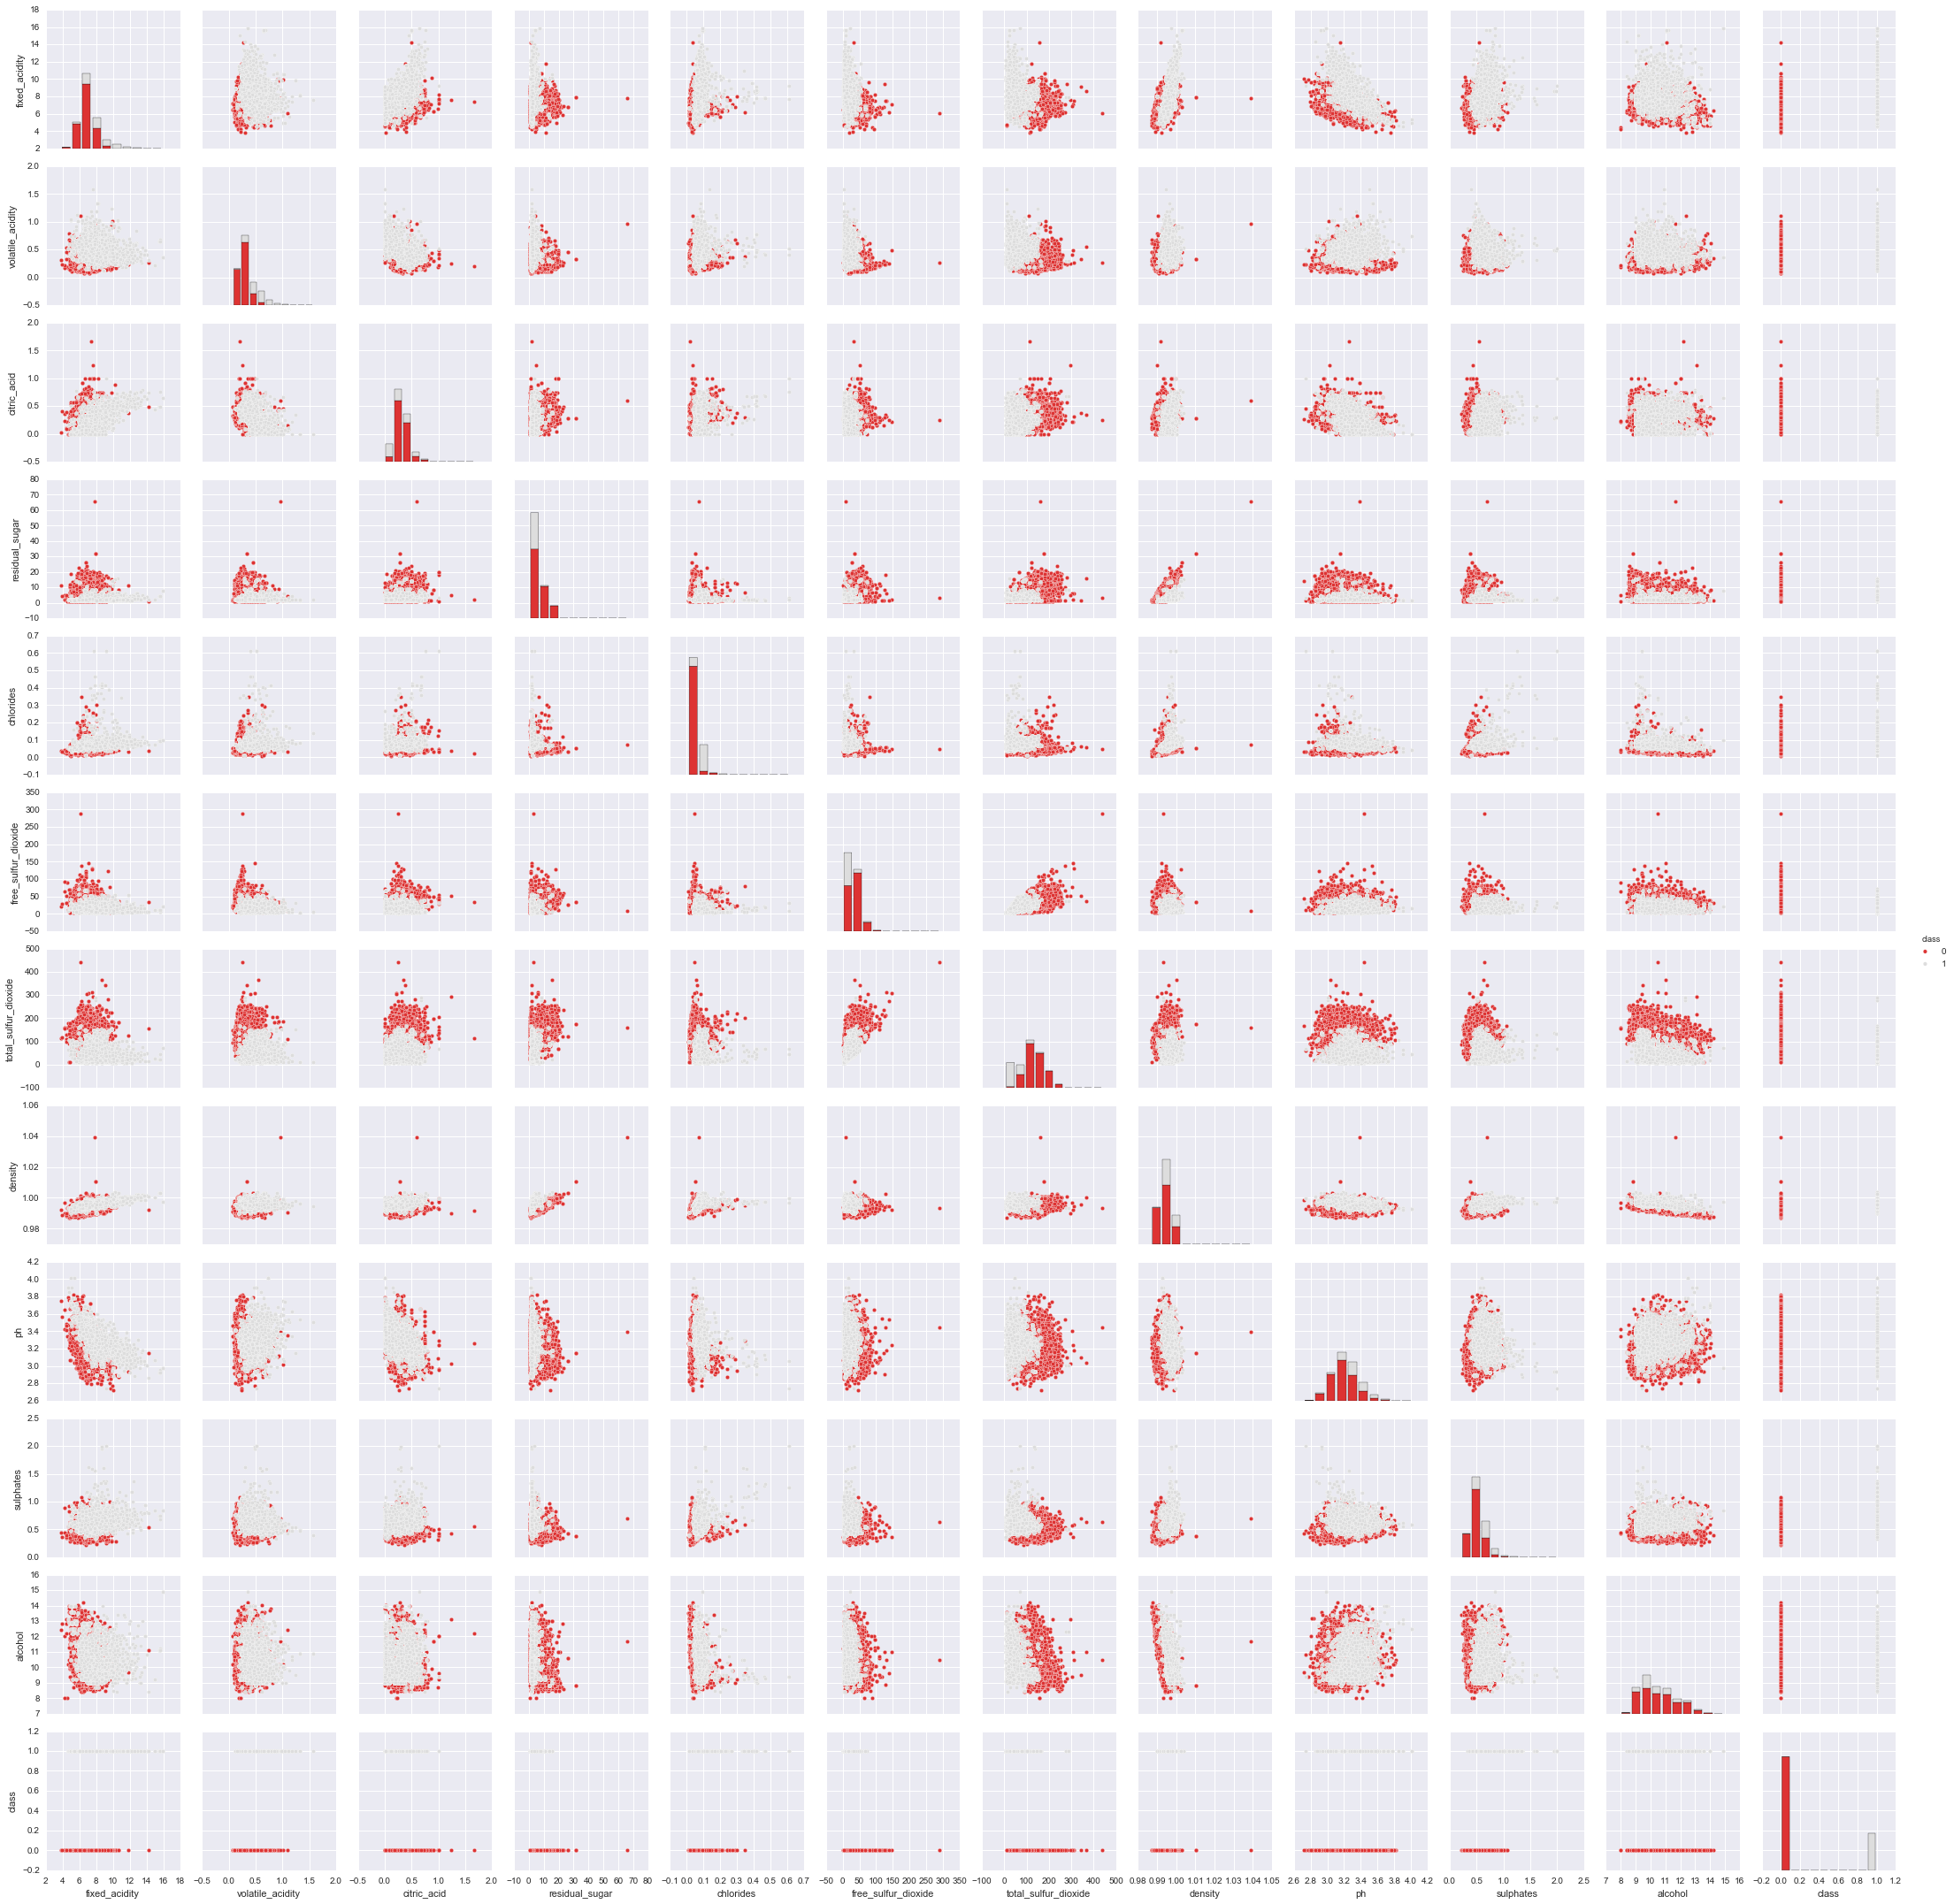

In [12]:
seaborn.pairplot(data=wine_all, 
                 hue='class', 
                 palette={0: '#dd3333', 1: '#dddddd'})

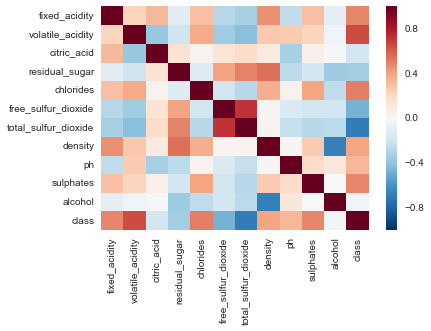

In [320]:
corr = wine_all.corr()
seaborn.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [13]:
class_1 = wine_all[wine_all['class']==0]
class_2 = wine_all[wine_all['class']==1]

In [14]:
class_1.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                ph    sulphates      alcohol   class  
count  4898.000000  4898.000000  4898.000000  4898.0  
mean      3.188267     0.489847    10.514267     0.0  
std       0.151001     0.114126     1.230621     0.0  
min       2.720000     0.220000     8.000000     0.0  
25%       3.090000     0.410000     9.500000     0.0  
50%       3.180000     0.470000    10.400000     0.0  
75%       3.280000     0.550000    11.400000     0.0  
max       3.820000     1.080000    14.200000     0.0

In [323]:
class_2.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                ph    sulphates      alcohol   class  
count  1599.000000  1599.000000  1599.000000  1599.0  
mean      3.311113     0.658149    10.422983     1.0  
std       0.154386     0.169507     1.065668     0.0  
min       2.740000     0.330000     8.400000     1.0  
25%       3.210000     0.550000     9.500000     1.0  
50%       3.310000     0.620000    10.200000     1.0  
75%       3.400000     0.730000    11.100000     1.0  
max       4.010000     2.000000    14.900000     1.0

C:\Users\Hua\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


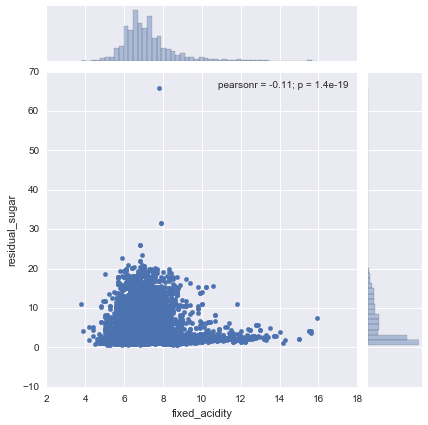

In [15]:
seaborn.jointplot(wine_all.fixed_acidity, wine_all.residual_sugar)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000020E83898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000002158FF60>], dtype=object)

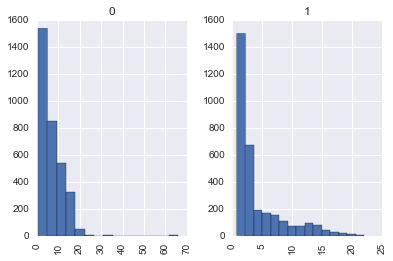

In [16]:
wine_all.residual_sugar.hist(bins=15, by=wine['class'])

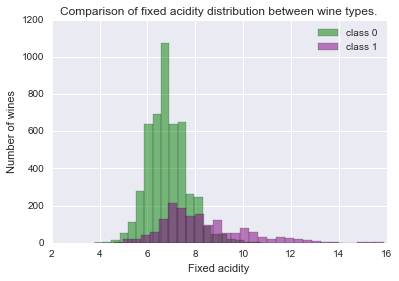

In [329]:
# Another approach with more customization support.
from matplotlib import pyplot

_ = pyplot.hist(wine_all[wine_all['class'] == 0].fixed_acidity, bins=30, color='green', alpha=0.5, label='class 0')
_ = pyplot.hist(wine_all[wine_all['class'] == 1].fixed_acidity, bins=30, color='purple', alpha=0.5, label='class 1')
pyplot.xlabel('Fixed acidity')
pyplot.ylabel('Number of wines')
pyplot.legend()
pyplot.title('Comparison of fixed acidity distribution between wine types.')

## Building your model

Many different options exist for building a decision tree model: try [sci-kit learn's implementation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to start.


In [73]:
import sklearn.tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from StringIO import *
# Run this command with '??' after to get documentation help within jupyter
sklearn.tree.DecisionTreeClassifier??

In [120]:
wine_train, wine_test = train_test_split(wine_all, test_size = 0.2)

In [121]:
wine_label_col = 'class'
wine_feature_cols_all = [c for c in wine_all.columns if c != wine_label_col]
wine_feature_cols_1 = ['fixed_acidity', 'free_sulfur_dioxide']
wine_feature_cols_2 = ['volatile_acidity', 'total_sulfur_dioxide']
wine_feature_cols_3 = ['citric_acid', 'sulphates']
wine_feature_cols_4 = ['residual_sugar', 'ph']
wine_feature_cols_5 = ['chlorides', 'alcohol']
wine_feature_cols_6 = ['density']
list_f_cols = [wine_feature_cols_all, wine_feature_cols_1, wine_feature_cols_2, wine_feature_cols_3, wine_feature_cols_4,
              wine_feature_cols_5, wine_feature_cols_6]
list_l_cols = ['All Features', 'fixed_acidity+free_sulfur_dioxide', 'volatile_acidity+total_sulfur_dioxide',
              'citric_acid+sulphates', 'residual_sugar+ph','chlorides+alcohol', 'density']
list_dtree_l = ['dtree_all', 'dtree1', 'dtree2', 'dtree3', 'dtree4', 'dtree5', 'dtree6']

In [350]:
list(wine_all.columns)
wine_feature_cols_all

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol']

In [115]:
from IPython.display import Image
import pydot

def tree_viz(sklearn_dtree):
    temp_buffer = StringIO() # use an in-memory file-like object instead of tmp file
    sklearn.tree.export_graphviz(sklearn_dtree, out_file=temp_buffer)
    temp_buffer.seek(0) # rewind the in-memory buffer to start
    graph, = pydot.graph_from_dot_data(temp_buffer.read())  
    return Image(graph.create_png()) 

In [116]:
# Define a function to check
def dtree_test(f_col, l_col):
    dtree = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
    dtree.fit(wine_train[f_col], wine_train[l_col])
    class_preds = dtree.predict(wine_test[f_col])
    num_correct = 0
    for pred, actual in zip(class_preds, wine_test[l_col]):
        if pred == actual:
            num_correct +=1
    print 'Accuracy on testing set: %.1f%%' % (num_correct / float(len(wine_test)) * 100 )
    test_auc = roc_auc_score(wine_test[l_col], class_preds)
    print 'AUC on the model: %s' % round(test_auc, 2)

In [429]:
dtree_test(wine_feature_cols_all, wine_label_col)

Accuracy on testing set: 99.0%
AUC on the model: 0.99


In [435]:
for index, f_c in enumerate(list_f_cols):
    print "Training Feature: " + list_l_cols[index] + ":"
    dtree_test(f_c, wine_label_col)
    list_dtree_l[index] = dtree

Training Feature: All Features:
Accuracy on testing set: 98.8%
AUC on the model: 0.99
Training Feature: fixed_acidity+free_sulfur_dioxide:
Accuracy on testing set: 83.6%
AUC on the model: 0.74
Training Feature: volatile_acidity+total_sulfur_dioxide:
Accuracy on testing set: 94.6%
AUC on the model: 0.92
Training Feature: citric_acid+sulphates:
Accuracy on testing set: 85.3%
AUC on the model: 0.76
Training Feature: residual_sugar+ph:
Accuracy on testing set: 81.9%
AUC on the model: 0.76
Training Feature: chlorides+alcohol:
Accuracy on testing set: 94.2%
AUC on the model: 0.92
Training Feature: density:
Accuracy on testing set: 77.8%
AUC on the model: 0.65


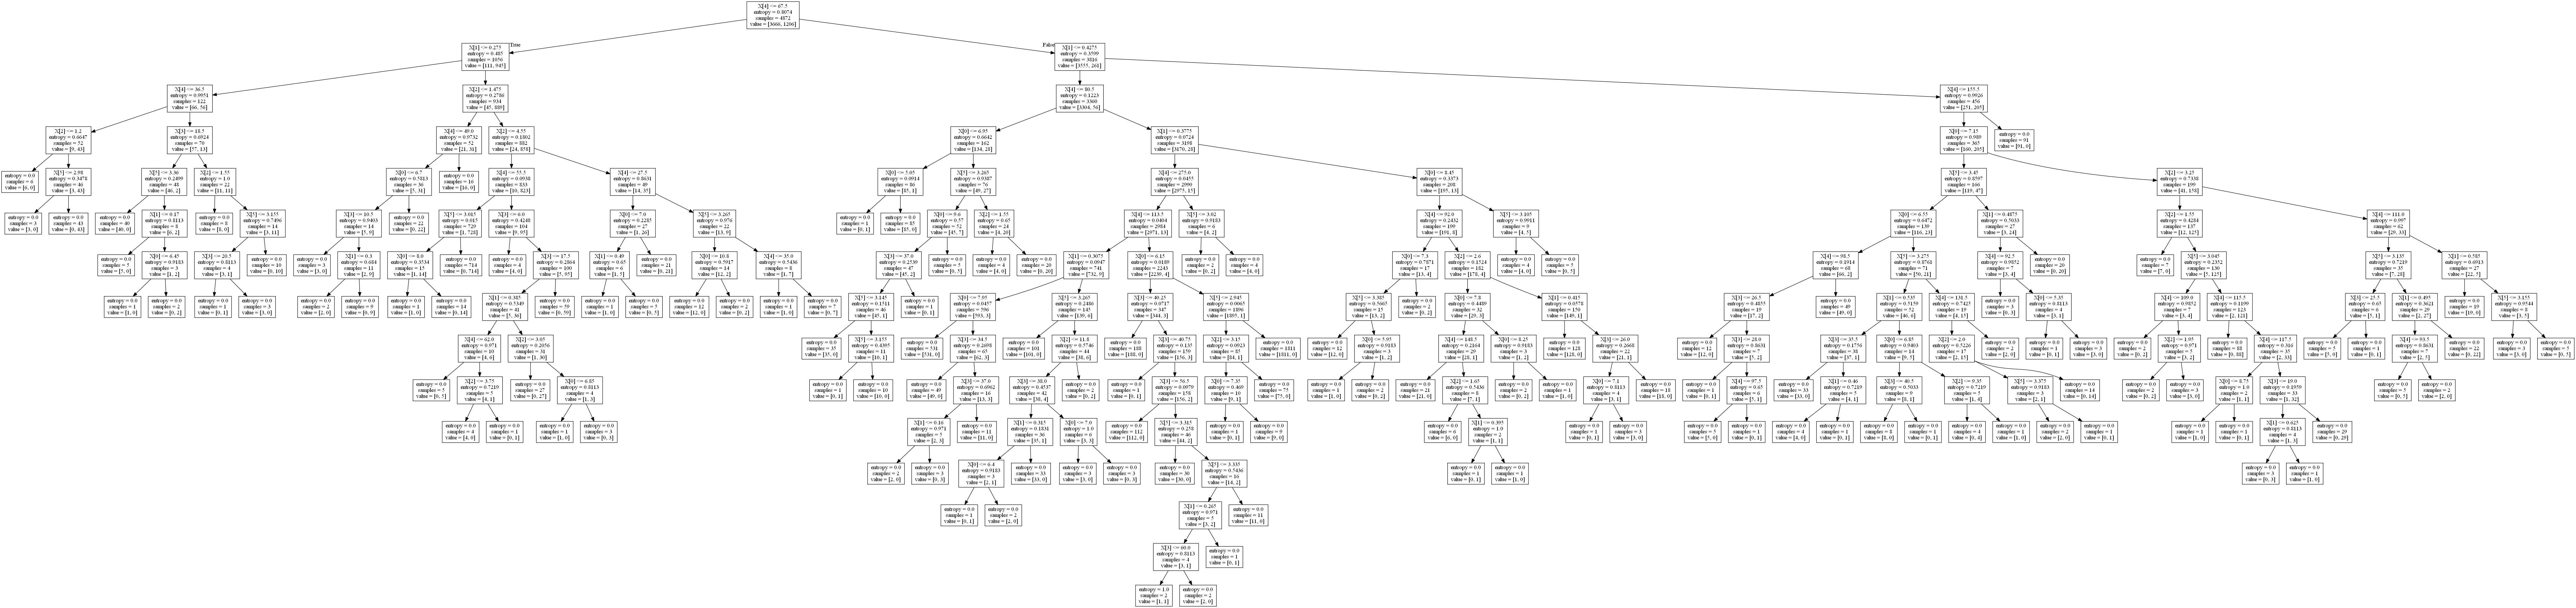

In [393]:
tree_viz(list_dtree_l[0])

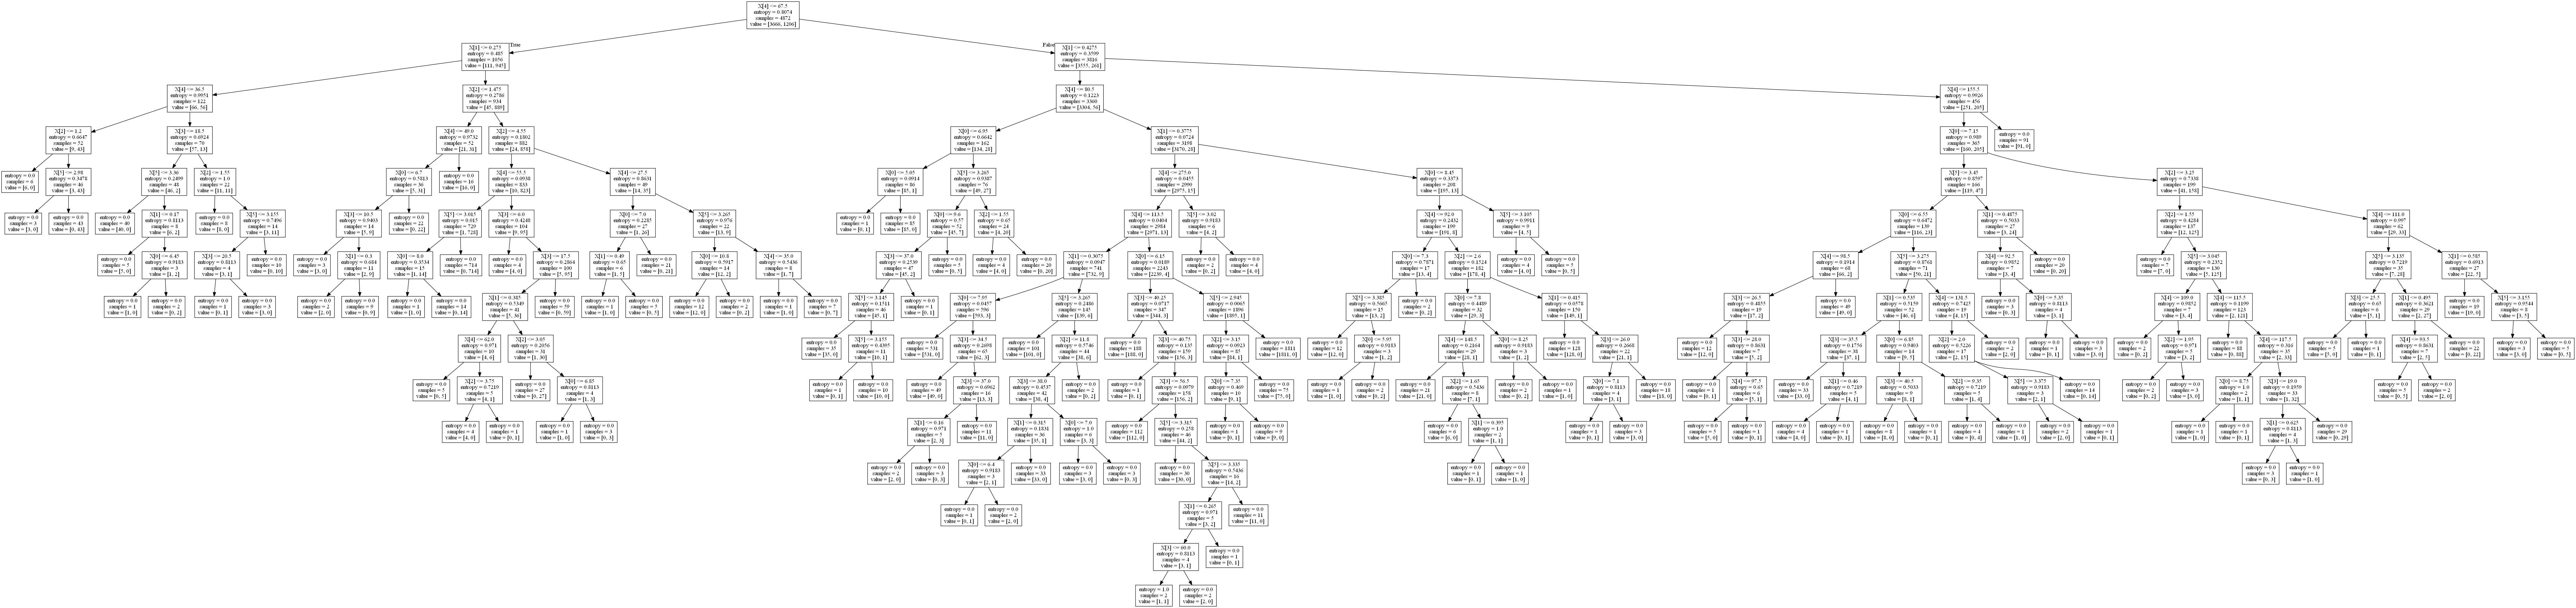

In [394]:
tree_viz(list_dtree_l[1])

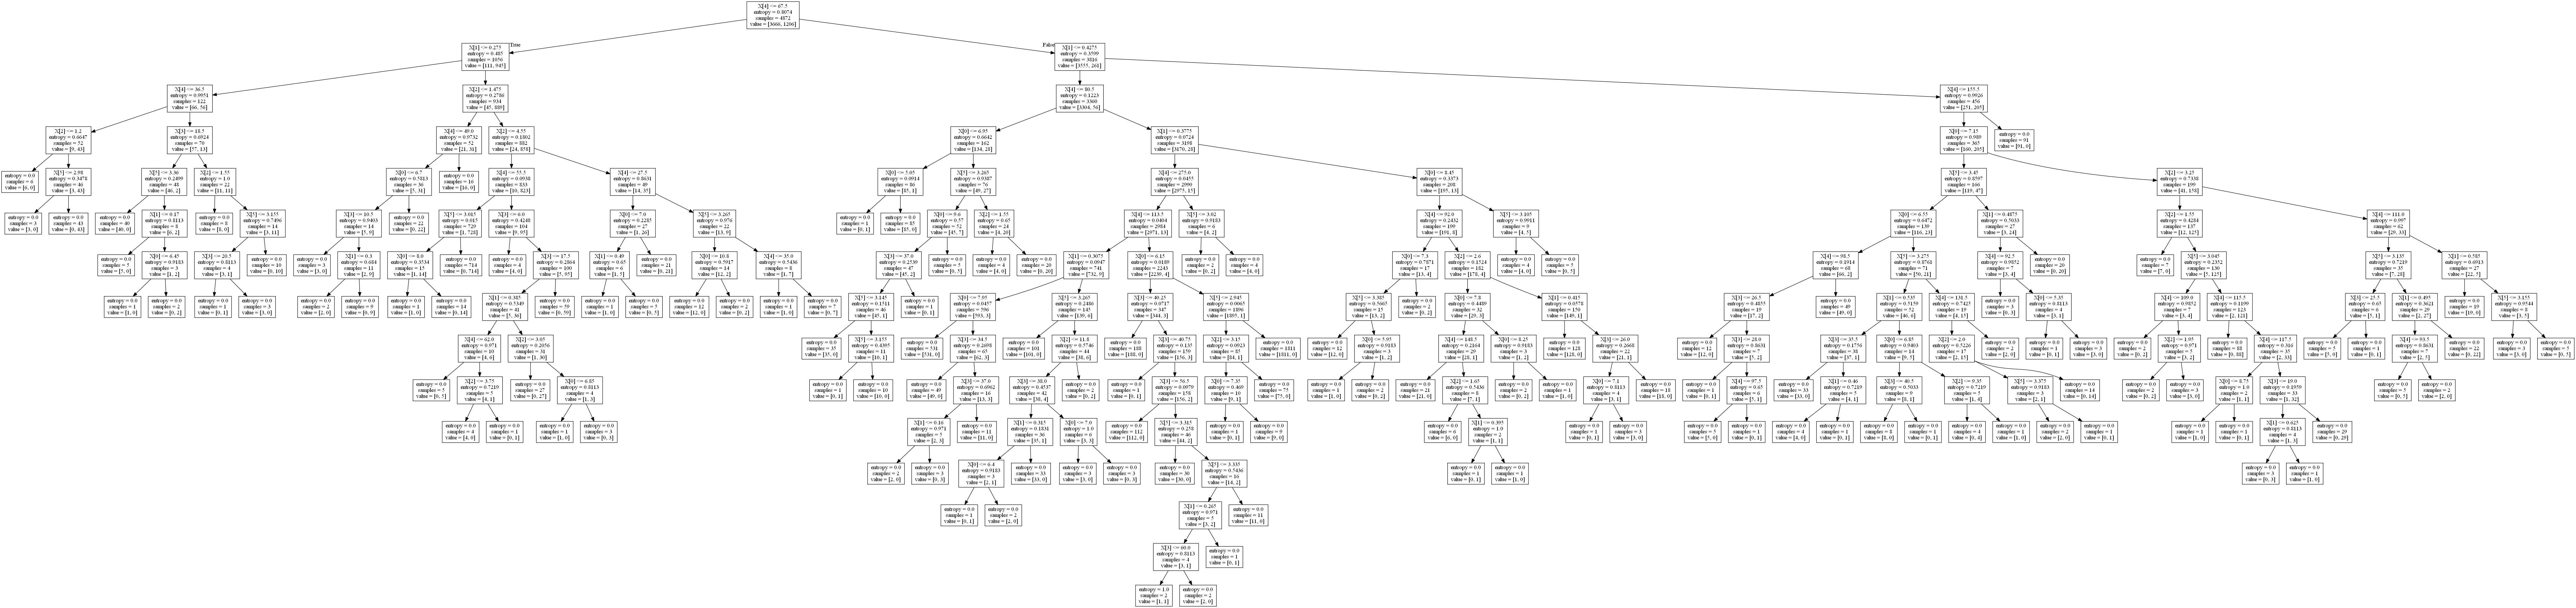

In [395]:
tree_viz(list_dtree_l[2])

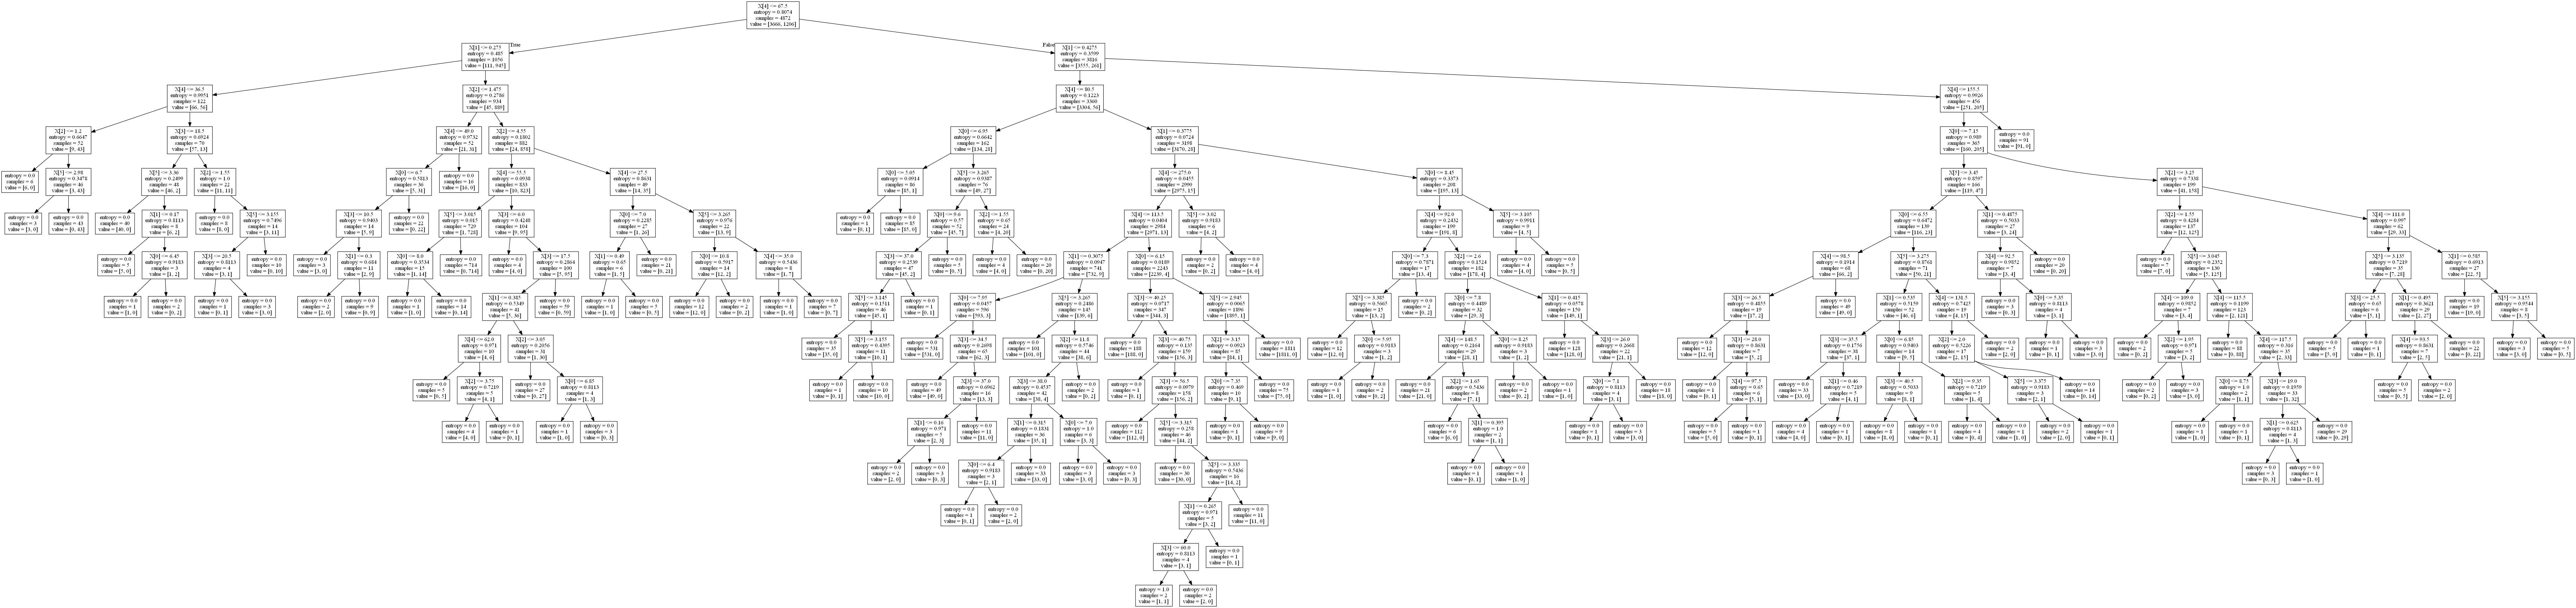

In [397]:
tree_viz(list_dtree_l[3])

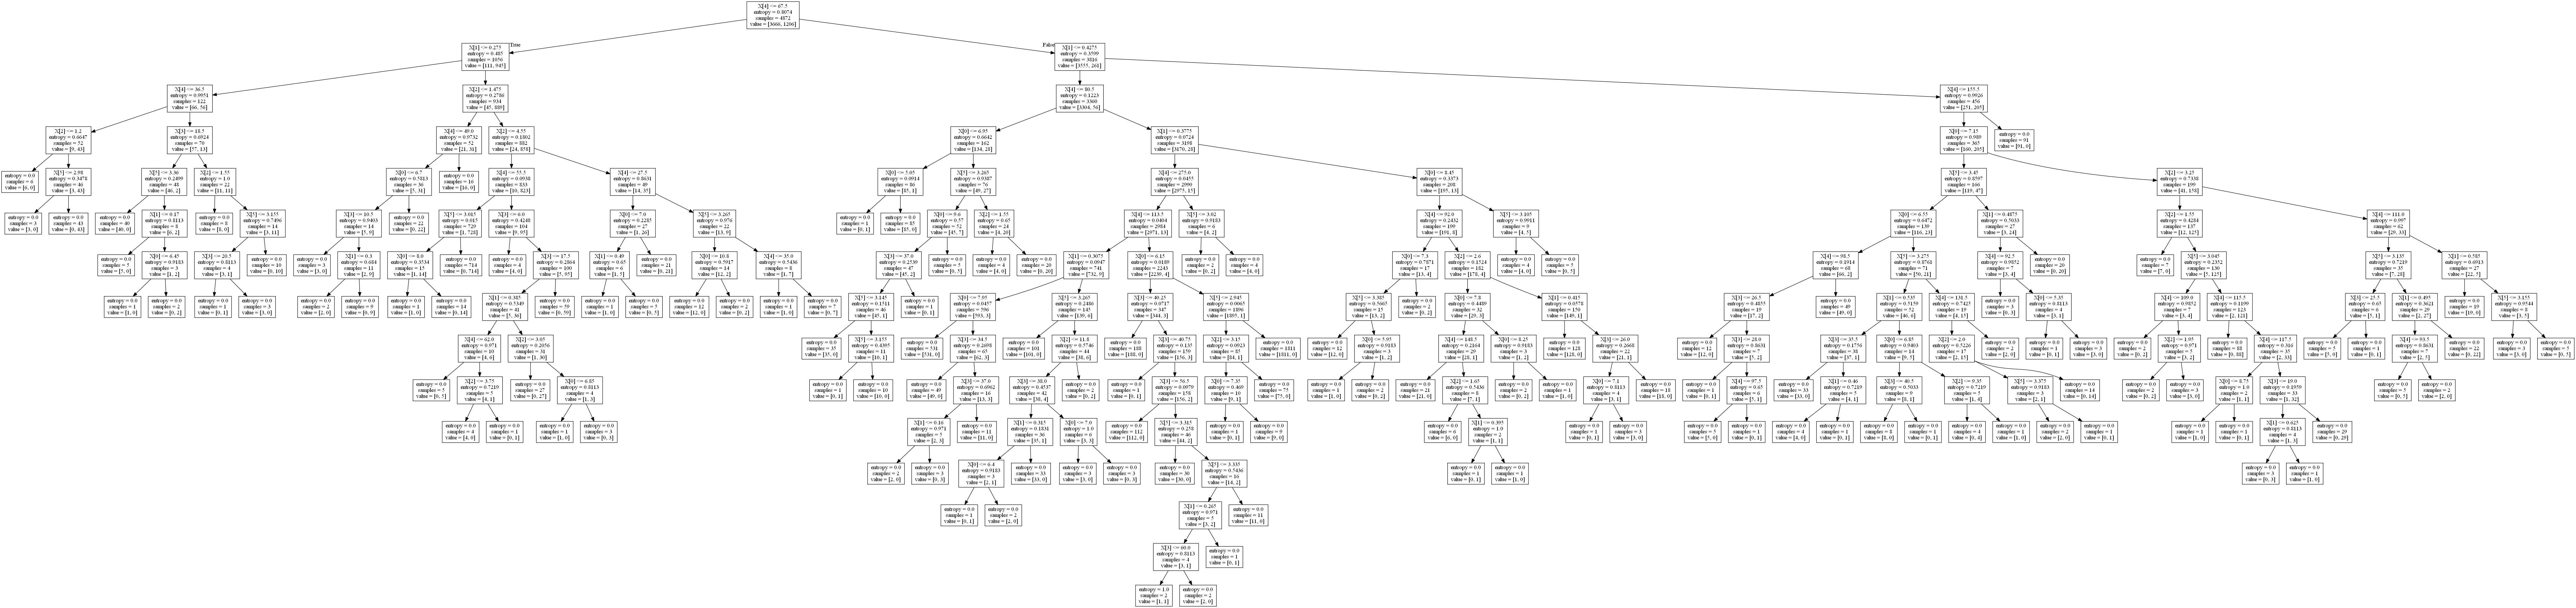

In [398]:
tree_viz(list_dtree_l[4])

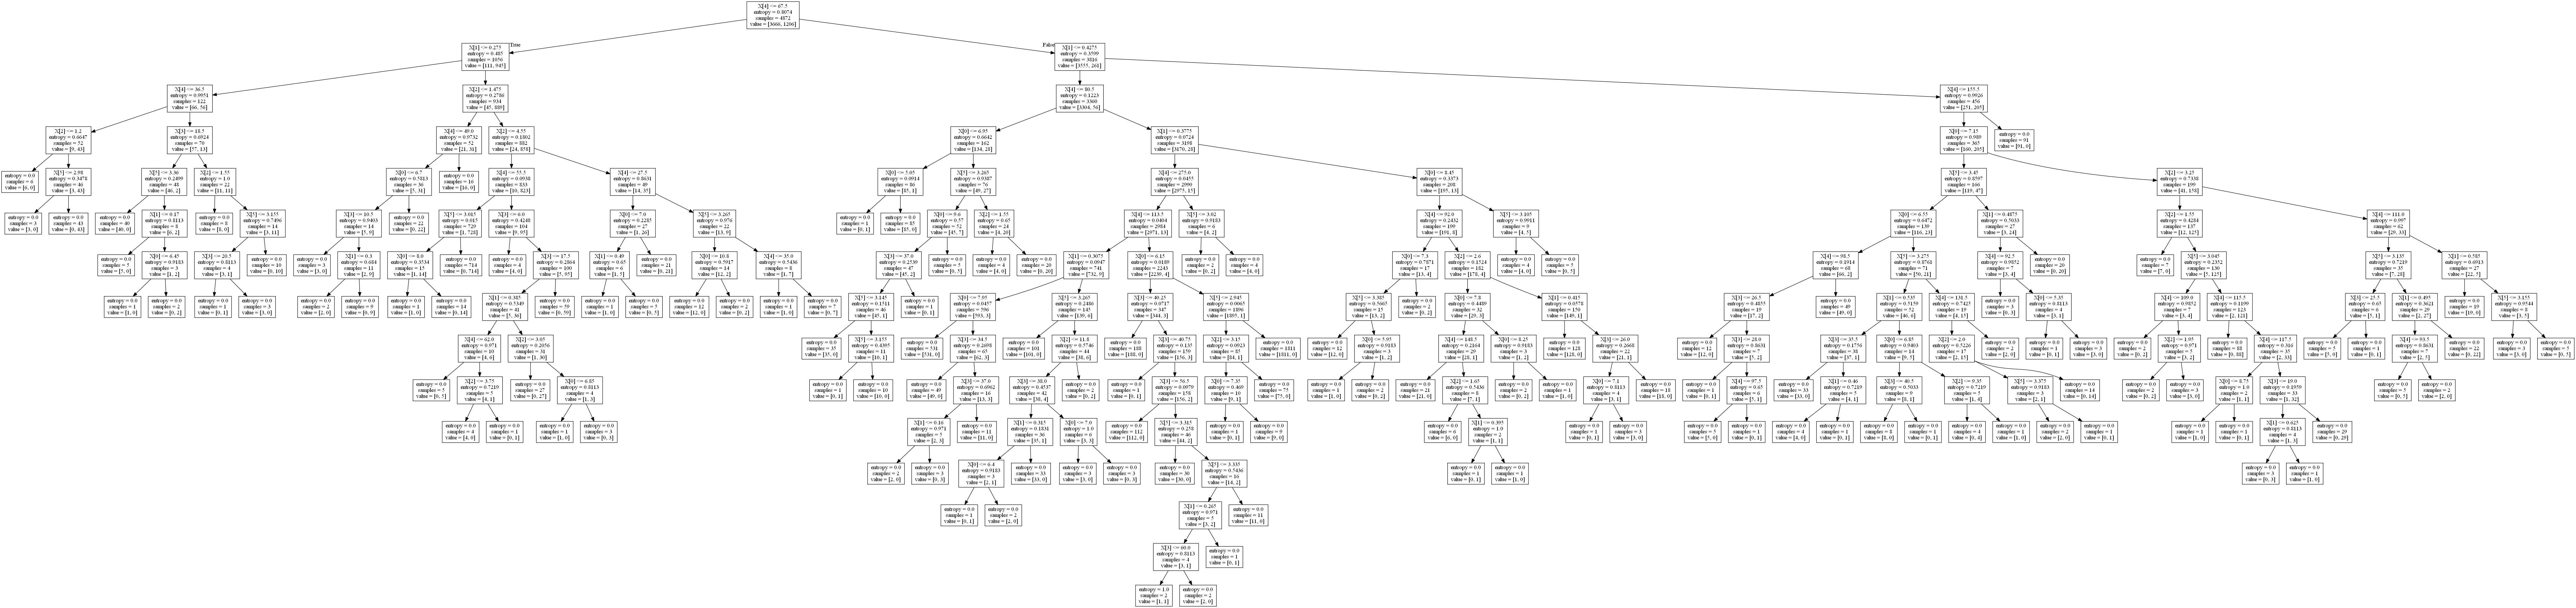

In [399]:
tree_viz(list_dtree_l[5])

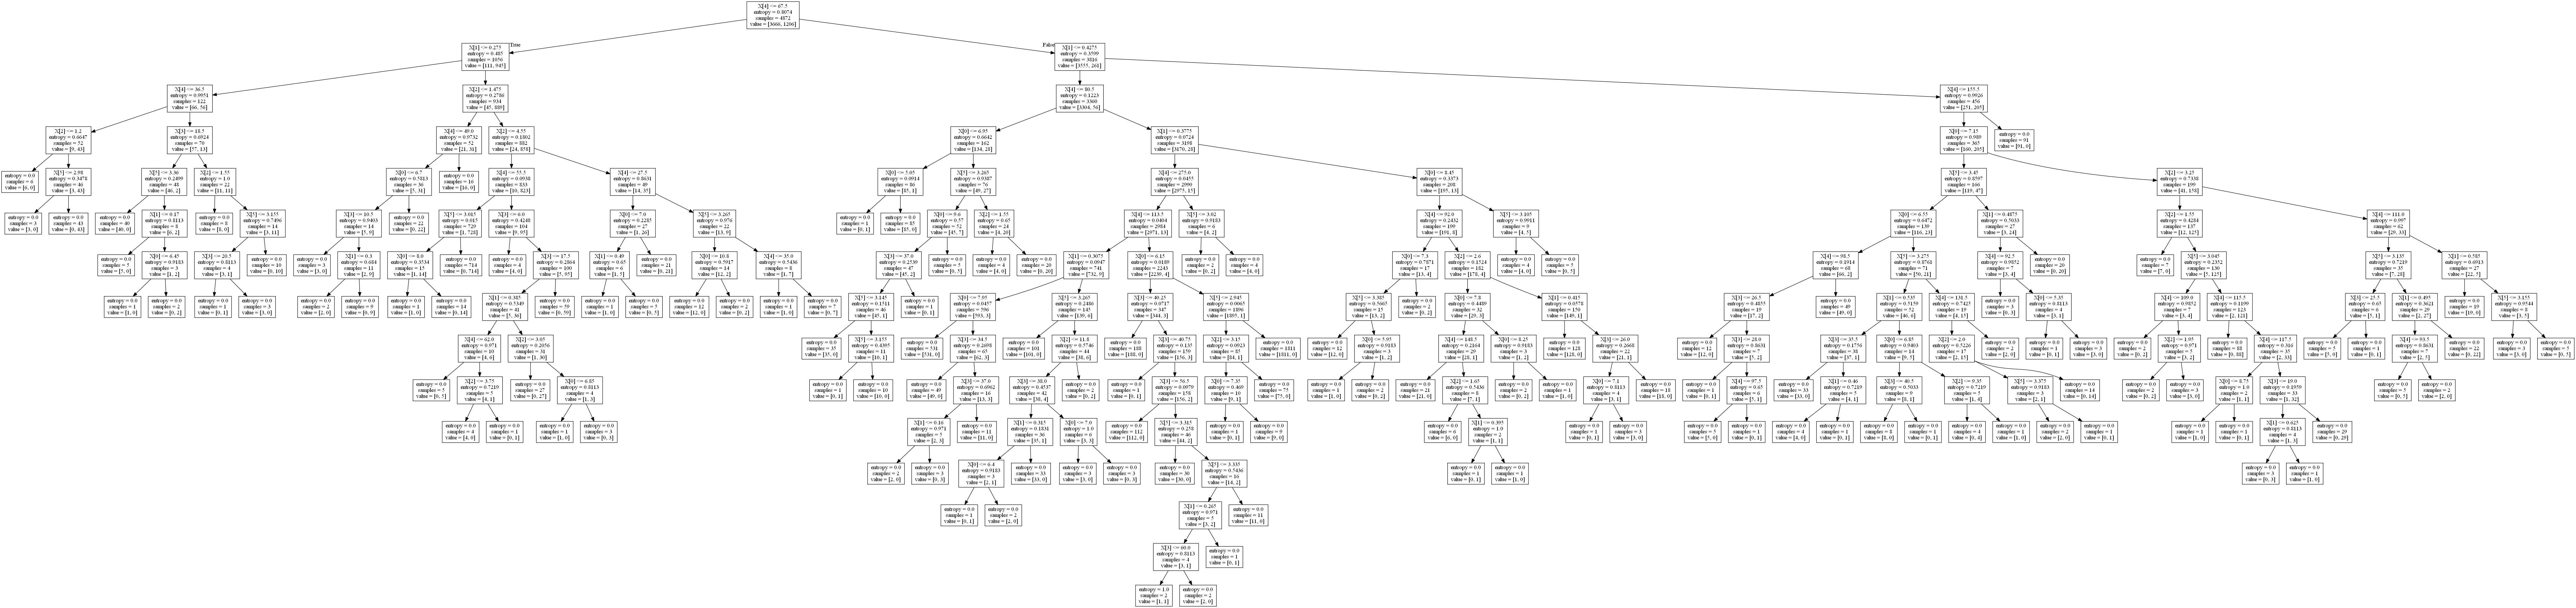

In [400]:
tree_viz(list_dtree_l[6])

## Use less attributes data from Canvas
##### Building your model

In [131]:
wine_train, wine_test = train_test_split(wine, test_size = 0.2)

In [127]:
list(wine_train.columns)

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'ph',
 'class']

In [132]:
wine_label_col = 'class'
wine_feature_cols_all = [c for c in wine.columns if c != wine_label_col]
wine_feature_cols_1 = ['fixed_acidity', 'free_sulfur_dioxide']
wine_feature_cols_2 = ['volatile_acidity', 'total_sulfur_dioxide']
wine_feature_cols_3 = ['residual_sugar', 'ph']
wine_feature_cols_4 = ['fixed_acidity']
wine_feature_cols_5 = ['volatile_acidity']
wine_feature_cols_6 = ['citric_acid']
wine_feature_cols_7 = ['residual_sugar']
wine_feature_cols_8 = ['free_sulfur_dioxide']
wine_feature_cols_9 = ['total_sulfur_dioxide']
wine_feature_cols_10 = ['ph']
list_f_cols = [wine_feature_cols_all, wine_feature_cols_1, wine_feature_cols_2, wine_feature_cols_3, wine_feature_cols_4,
              wine_feature_cols_5, wine_feature_cols_6, wine_feature_cols_7, wine_feature_cols_8, wine_feature_cols_9, wine_feature_cols_10]
list_l_cols = ['All Features', 'fixed_acidity+free_sulfur_dioxide', 'volatile_acidity+total_sulfur_dioxide',
              'residual_sugar+ph', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'free_sulfur_dioxide',
              'total_sulfur_dioxide', 'ph']
list_dtree_l = ['dtree_all', 'dtree1', 'dtree2', 'dtree3', 'dtree4', 'dtree5', 'dtree6', 'dtree7', 'dtree8', 'dtree9', 'dtree10']

In [118]:
for index, f_c in enumerate(list_f_cols):
    print "Training Feature: " + list_l_cols[index] + ":"
    dtree_test(f_c, wine_label_col)
    list_dtree_l[index] = dtree

Training Feature: All Features:
Accuracy on testing set: 97.7%
AUC on the model: 0.97
Training Feature: fixed_acidity+free_sulfur_dioxide:
Accuracy on testing set: 82.7%
AUC on the model: 0.74
Training Feature: volatile_acidity+total_sulfur_dioxide:
Accuracy on testing set: 93.8%
AUC on the model: 0.91
Training Feature: residual_sugar+ph:
Accuracy on testing set: 83.1%
AUC on the model: 0.76
Training Feature: fixed_acidity:
Accuracy on testing set: 81.2%
AUC on the model: 0.66
Training Feature: volatile_acidity:
Accuracy on testing set: 85.6%
AUC on the model: 0.76
Training Feature: citric_acid:
Accuracy on testing set: 80.3%
AUC on the model: 0.65
Training Feature: residual_sugar:
Accuracy on testing set: 83.3%
AUC on the model: 0.78
Training Feature: free_sulfur_dioxide:
Accuracy on testing set: 80.4%
AUC on the model: 0.68
Training Feature: total_sulfur_dioxide:
Accuracy on testing set: 91.7%
AUC on the model: 0.86
Training Feature: ph:
Accuracy on testing set: 74.4%
AUC on the mode

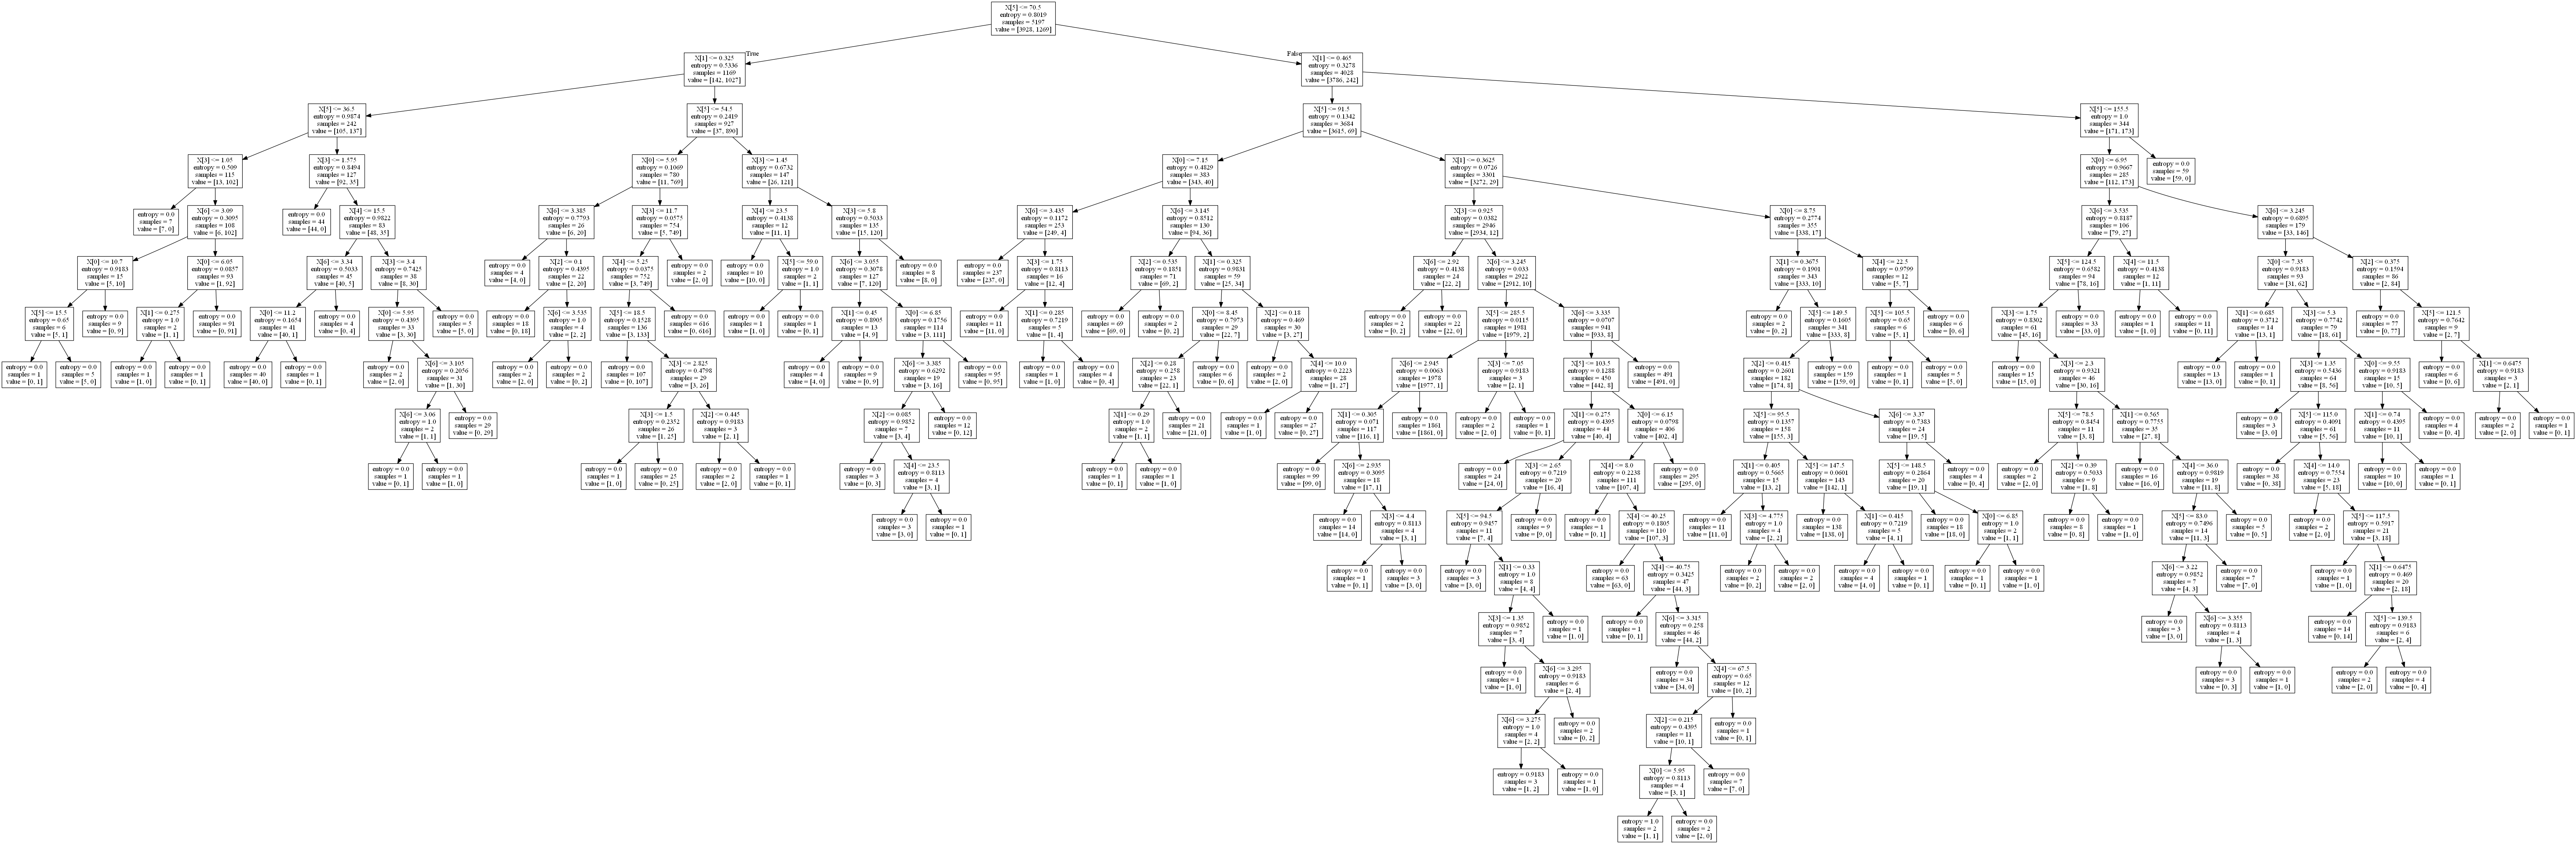

In [71]:
tree_viz(dtree)

## Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [133]:
def rf_test(f_col, l_col):
    rf = RandomForestClassifier(criterion='entropy')
    rf.fit(wine_train[f_col], wine_train[l_col])
    class_preds = rf.predict(wine_test[f_col])
    num_correct = 0
    for pred, actual in zip(class_preds, wine_test[l_col]):
        if pred == actual:
            num_correct +=1
    print 'Accuracy on testing set: %.1f%%' % (num_correct / float(len(wine_test)) * 100 )
    test_auc = roc_auc_score(wine_test[l_col], class_preds)
    print 'AUC on the model: %s' % round(test_auc, 2)

In [139]:
rf_test(wine_feature_cols_all, wine_label_col)
from sklearn.metrics import accuracy_score

Accuracy on testing set: 98.6%
AUC on the model: 0.98
Accuracy (random forrest, sklearn): 0.98


In [135]:
rf = RandomForestClassifier(criterion='entropy')
rf.fit(wine_train[wine_feature_cols_all], wine_train[wine_label_col])
class_preds = rf.predict(wine_test[wine_feature_cols_all])

 1) total_sulfur_dioxide           0.425395
 2) volatile_acidity               0.183220
 3) residual_sugar                 0.115321
 4) free_sulfur_dioxide            0.099684
 5) fixed_acidity                  0.086874
 6) ph                             0.058083
 7) citric_acid                    0.031424


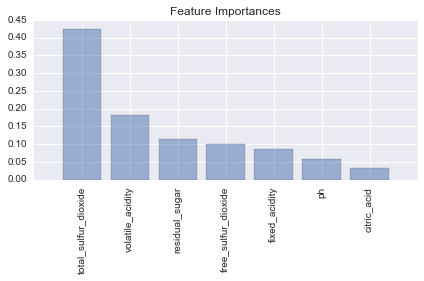

In [136]:
import numpy as np
import matplotlib.pyplot as plt

importances = rf.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]
for f in range(wine_train[wine_feature_cols_all].shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            wine[wine_feature_cols_all].columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(wine_train[wine_feature_cols_all].shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(wine_train[wine_feature_cols_all].shape[1]), 
           wine[wine_feature_cols_all].columns.values[indices], rotation=90)
plt.xlim([-1, wine_train[wine_feature_cols_all].shape[1]])
plt.tight_layout()
plt.savefig('./fig-forest-feature-importances.png', dpi=300)
plt.show()


## Investigate shuffle using sample

In [144]:
wine.head()
wine_shuffled=wine.sample(frac=1.0)

In [153]:
wine_shuffled.head(), wine.head()

(      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
 5903            6.1              0.24         0.25             1.6   
 5202            7.0              0.32         0.27             7.1   
 1607            6.3              0.30         0.34             1.6   
 6408            6.0              0.26         0.24             1.3   
 1549            7.4              0.36         0.30             1.8   
 
       free_sulfur_dioxide  total_sulfur_dioxide    ph  class  
 5903                 24.0                 115.0  3.39      0  
 5202                 37.0                 122.0  3.15      0  
 1607                 14.0                 132.0  3.30      0  
 6408                 66.0                 150.0  3.21      0  
 1549                 17.0                  24.0  3.24      1  ,
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
 0            7.4              0.70         0.00             1.9   
 1            7.8              0.88         0.00   

In [154]:
wine.shape, wine_shuffled.shape

((6497, 8), (6497, 8))

In [157]:
n_train = int(round(6497*0.8))
print n_train
train = wine_shuffled.iloc[:, :n_train]
test = wine_shuffled.iloc[:, n_train:]

5198


In [160]:
import itertools

In [161]:
itertools.product()

itertools.product

In [162]:
!pip install tensorboard

ImportError: No module named site


In [163]:
!pip search tensorboard

ImportError: No module named site


In [164]:
!conda install tensorboard

Fetching package metadata ...........



PackageNotFoundError: Package missing in current win-64 channels: 
  - tensorboard

